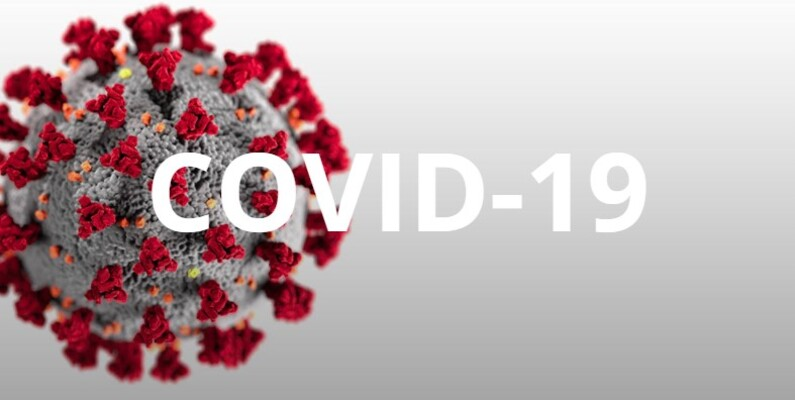

# content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Covid Data.csv")
print("Shape of df :",df.shape)
df.head()


Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.isna().sum().sum()
# We have no NaN values but we will have missing values.

0

In [6]:
for i in df.columns:
    print(i.lower(),"=",len(df[i].unique()))

usmer = 2
medical_unit = 13
sex = 2
patient_type = 2
date_died = 401
intubed = 4
pneumonia = 3
age = 121
pregnant = 4
diabetes = 3
copd = 3
asthma = 3
inmsupr = 3
hipertension = 3
other_disease = 3
cardiovascular = 3
obesity = 3
renal_chronic = 3
tobacco = 3
clasiffication_final = 7
icu = 4


In [7]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [8]:
df.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [9]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [10]:
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

# Data Preprocessing

In [11]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]
#Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"

In [12]:
# If we have "9999-99-99" values that means this patient is alive.
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

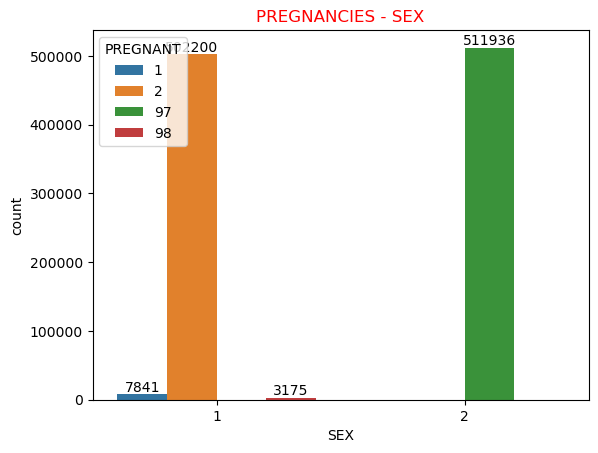

In [13]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [14]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

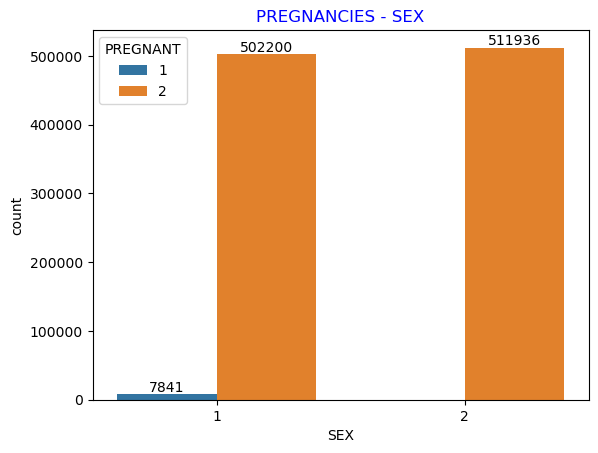

In [15]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="blue");

In [16]:
#In "INTUBED" and "ICU" features there are too many missing values so i will drop them.
#Also we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [17]:
for i in df.columns:
    print(i.lower(),"=",len(df[i].unique()))

usmer = 2
medical_unit = 13
sex = 2
patient_type = 2
pneumonia = 2
age = 121
pregnant = 2
diabetes = 2
copd = 2
asthma = 2
inmsupr = 2
hipertension = 2
other_disease = 2
cardiovascular = 2
obesity = 2
renal_chronic = 2
tobacco = 2
clasiffication_final = 7
death = 2


# Data Visualization

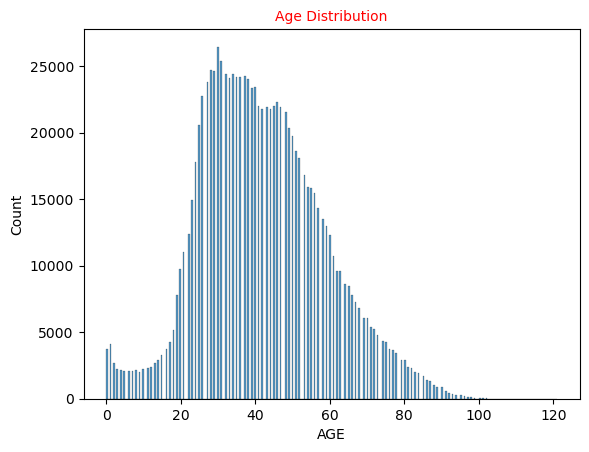

In [18]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=10);

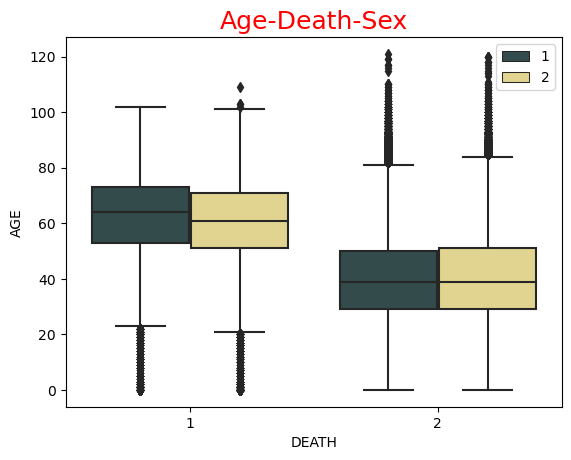

In [19]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

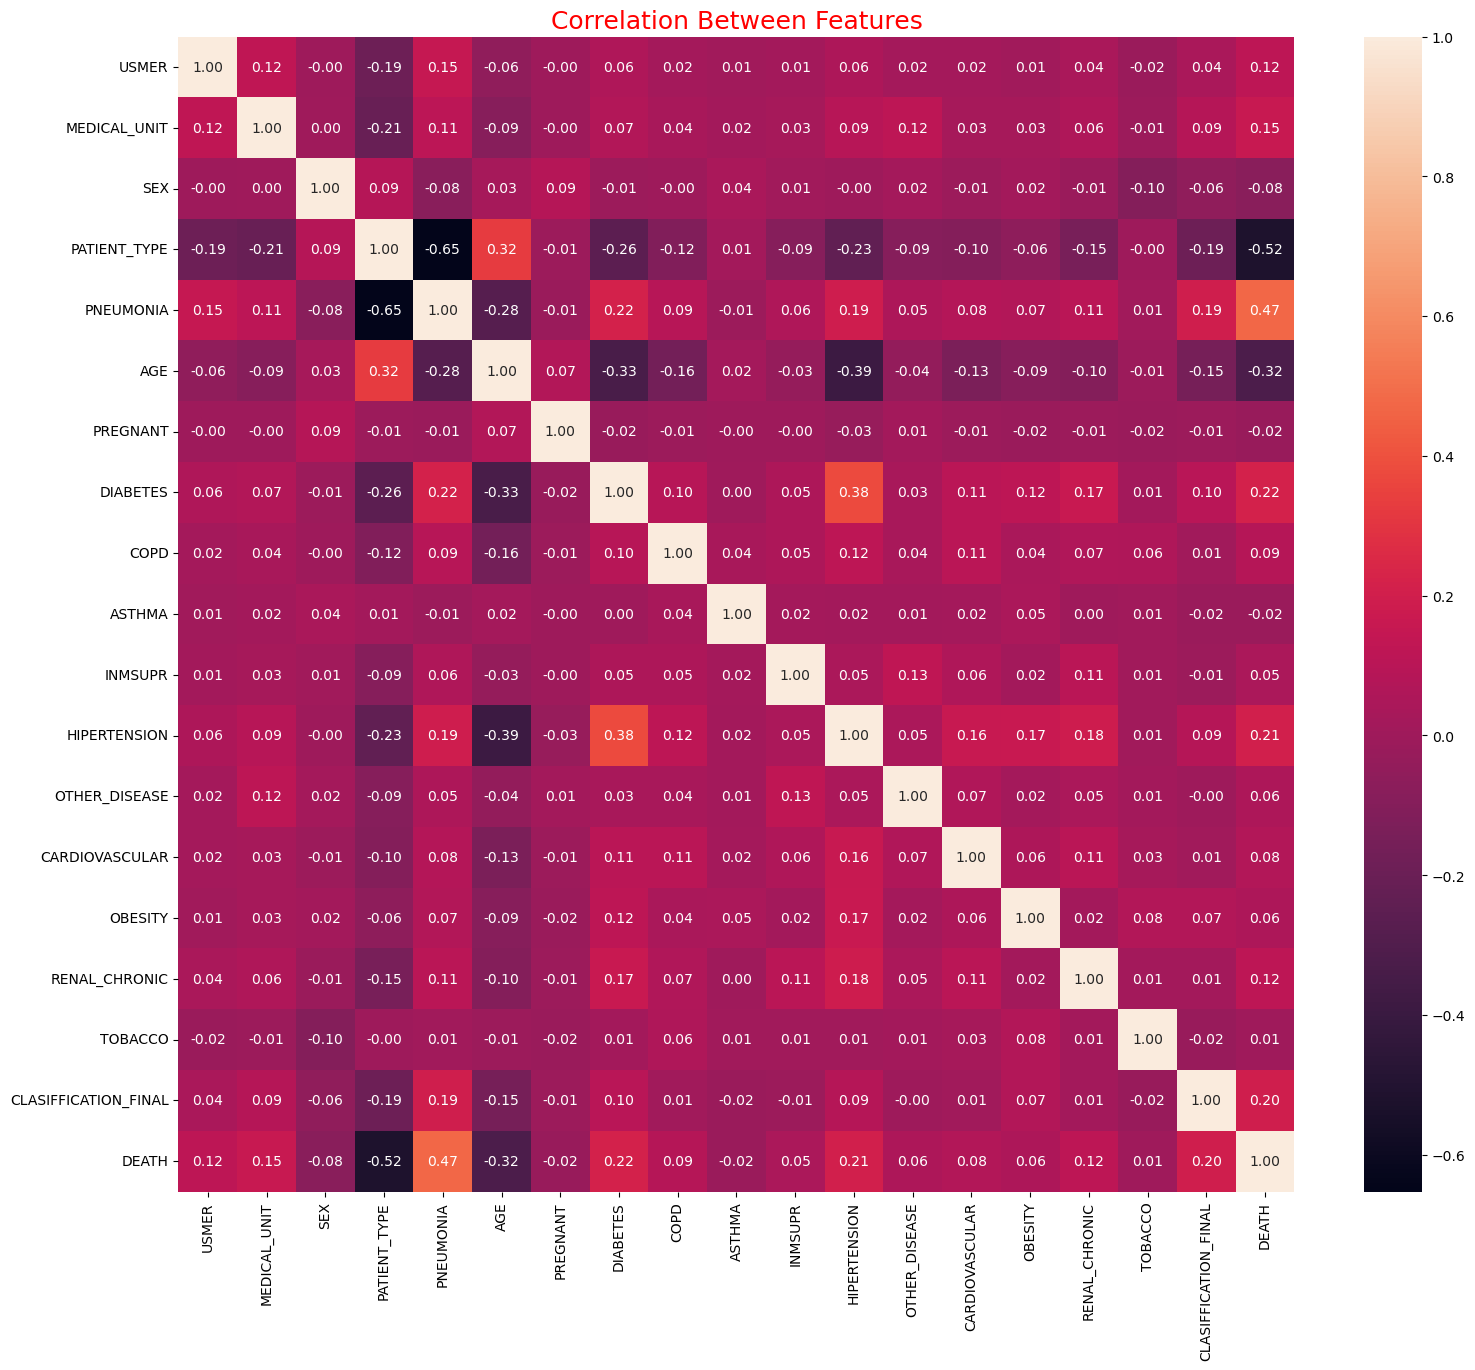

In [20]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

In [21]:
#I will drop the features that have low correlation with "DEATH" feature.
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

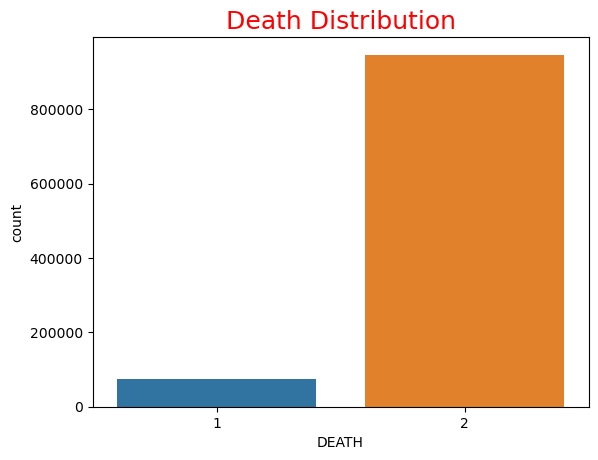

In [22]:
sns.countplot( x= df.DEATH)
plt.title("Death Distribution", fontsize=18,color="red");
#IMPLANCED DATA problem 

# How To Solve Imbalance Dataset Problem
- Loading More Datas
- Changing The Perfomance Metrics
- Resampling (Undersampling or Oversampling)
- Changing The Algorithm
- Penalized Models etc.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021977 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1021977 non-null  int64
 1   MEDICAL_UNIT          1021977 non-null  int64
 2   PATIENT_TYPE          1021977 non-null  int64
 3   PNEUMONIA             1021977 non-null  int64
 4   AGE                   1021977 non-null  int64
 5   DIABETES              1021977 non-null  int64
 6   HIPERTENSION          1021977 non-null  int64
 7   RENAL_CHRONIC         1021977 non-null  int64
 8   CLASIFFICATION_FINAL  1021977 non-null  int64
 9   DEATH                 1021977 non-null  int64
dtypes: int64(10)
memory usage: 118.0 MB


In [24]:
from imblearn.over_sampling import SMOTE


# Separate features and target variable
x = df.drop(columns="DEATH",axis=1)
y = df["DEATH"]

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

# Check the new class distribution
print(y_resampled.value_counts())


1    947320
2    947320
Name: DEATH, dtype: int64


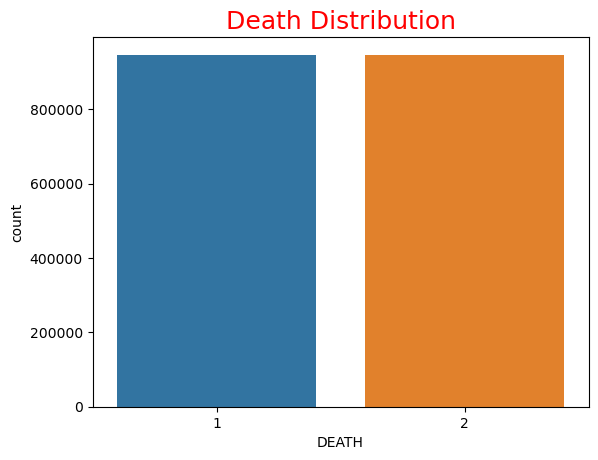

In [31]:
sns.countplot( x= y_resampled)
plt.title("Death Distribution", fontsize=18,color="red");
#IMPLANCED DATA solved 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.3, random_state=42)

# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(penalty= "l2" , C = 0.5)
lr.fit(x_train,y_train)

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9069306796315622
0.9075022167799688


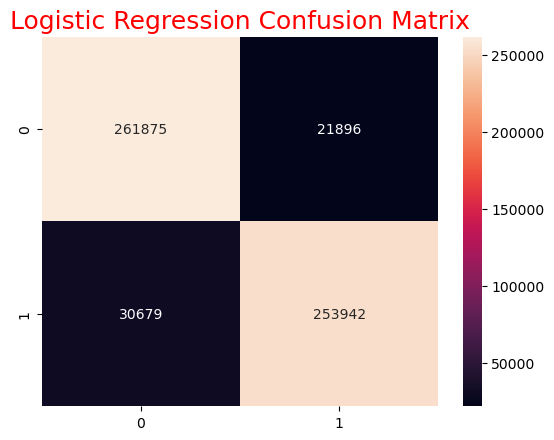

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");